In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import tools 
from model import model_bufferstock
import estimate

# Exercise 4: Estimating the buffer-stock consumption model with MLE and MSM 

Consider the canonical buffer-stock consumpion model. The exercise will be to add code to estimate such that we can produce consistent estimates under both MLE and MSM.

#### 1. Ensure that you *understand* the following sections and functions:
<il type ="a">
<li> section a)  and b)</li>
<li> estimate.updatepar </li>
<li> estimate.maximum_likelihood </li>
</il>

##### a) Solve

In [2]:
#Settings, Solve and simulate
model = model_bufferstock()
model.life_cycle_setup()
model.create_grids()
model.solve()
model.simulate()


##### b) Create data set

In [3]:
par = model.par
sol = model.sol
sim = model.sim

par.sigma_eta = 0.1

class data: pass
data.t = 20 # Time period used for estimation
data.M = sim.M[data.t,:]
data.P = sim.P[data.t,:]
data.m = sim.m[data.t,:]
data.logC = np.log(sim.C[data.t,:])-np.random.normal(scale=par.sigma_eta, size=(1,par.simN)) #Add noise to the data


#### 2. Fill in the missing stuff in the function:
<il type ="a">
<li> estimate.log_likelihood</li>

#### 3. Run section c) and d) and check that your results are correct

##### c) Illustrate likelihood function

In [4]:
#Copy the true parameters,
import copy
par_beta = copy.copy(par.beta)
par_rho = copy.copy(par.rho)

# Make grid
Nbeta = 20
Nrho = 15
beta = np.linspace(0.9,0.97,Nbeta)
rho = np.linspace(1.1,4,Nrho)

# Allocate
log_lik = np.nan + np.zeros((Nbeta,Nrho))

# Find the log-likelihood for each combination of beta and rho
for i in range(Nbeta):
    print(i) # print i, and thereby it shows how far the code is
    for j in range(Nrho):
        est_par = ['beta','rho']
        theta0 = [beta[i], rho[j]]
        log_lik[i,j]=estimate.log_likelihood(theta0, model, est_par, data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


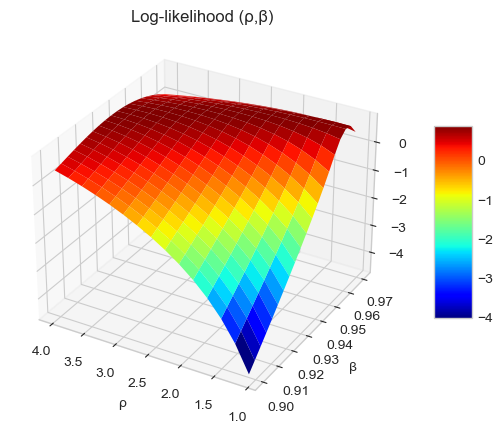

In [5]:
# plot figure in three dimensions
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('seaborn-whitegrid')

# Set up figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Make data.
X, Y = np.meshgrid(rho, beta)

# Plot the surface.
surf = ax.plot_surface(X, Y, log_lik, cmap=cm.jet)

# Customize the axis.
ax.set_xlabel(f'\u03C1')
ax.set_ylabel(f'\u03B2')
ax.set_title(f'Log-likelihood (\u03C1,\u03B2)')
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

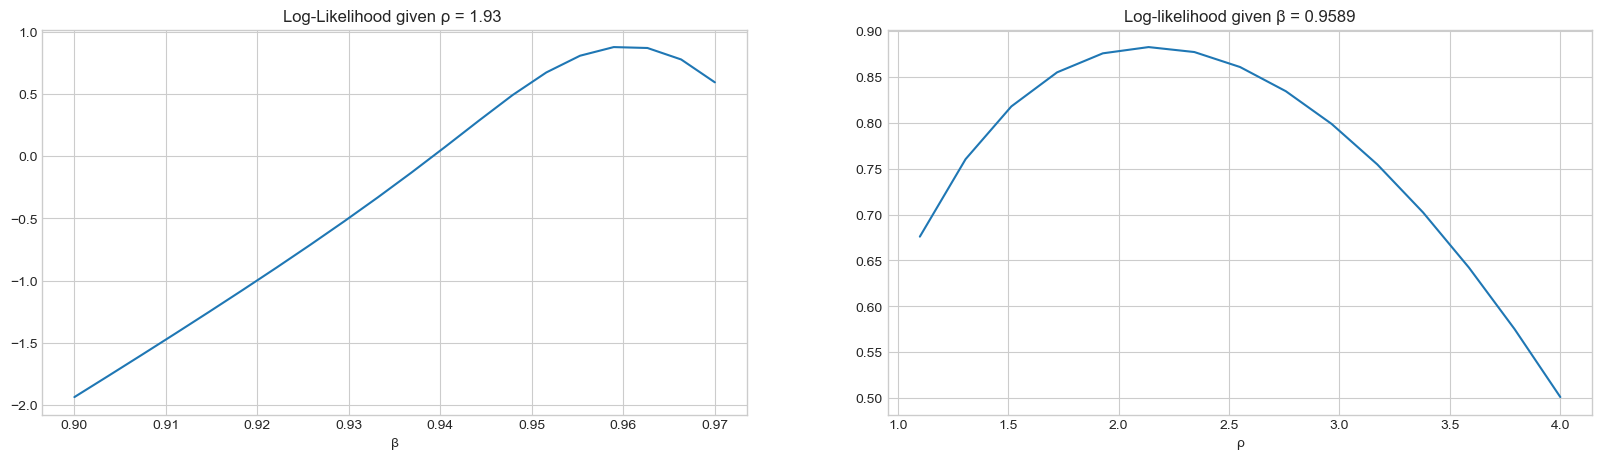

In [6]:
# Plot figure in two dimensions
i_rho = abs(par_rho - rho).argmin(0) #index of rho closest to the true rho
i_beta = abs(par_beta - beta).argmin(0) #index of beta closest to the true beta

#Set up figure
fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(beta,log_lik[:,i_rho])
ax.set_xlabel(f'\u03B2')
ax.set_title(f'Log-Likelihood given \u03C1 = {rho[i_rho]:.2f} ')

ax = fig.add_subplot(1,2,2)
ax.plot(rho,log_lik[i_beta,:])
ax.set_xlabel(f'\u03C1')
ax.set_title(f'Log-likelihood given \u03B2 = {beta[i_beta]:.4f}')


plt.show()

##### d) Estimate by MLE

In [7]:
est_par = ['beta'] # Parameter to estimate
theta0 = [0.94] # Initial guess

est = estimate.maximum_likelihood(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)

print(f'Log-Likelihood:          {-est.fun:.4f}')
print(f'beta:                    {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')

Log-Likelihood:          0.8826
beta:                    0.9600
Number of iterartions:   6


In [8]:
est_par = ['rho'] # Parameter to estimate
theta0 = [4] # Initial guess

est = estimate.maximum_likelihood(model, est_par,theta0,data)

#Re-inset the true parameters 
par.rho = copy.copy(par_rho)

print(f'Log-Likelihood:          {-est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')

Log-Likelihood:          0.8826
rho:                     2.0007
Number of iterartions:   6


In [9]:
est_par = ['rho','beta'] # Parameters to estimate
theta0 = [3, 0.94] # Initial guesses

est = estimate.maximum_likelihood(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

print(f'Log-Likelihood:          {-est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'beta:                    {est.x[1]:.4f}')
print(f'Number of iterartions:   {est.nit}')

Log-Likelihood:          0.8826
rho:                     2.0449
beta:                    0.9597
Number of iterartions:   19


#### 4. Ensure that you *understand* the following section and functions:
<il type ="a">
<li> section e) </li>
<li> estimate.calc_moments </li>
<li> estimate.method_simulated_moments </li>
</il>


##### e) MSM Settings

In [10]:
par.simN = 30000
par.moments_minage = 40
par.moments_maxage = 55
par.moments_numsim = 1
data = copy.copy(sim)
data.moments = estimate.calc_moments(par,data)

#### 5. Fill in the missing stuff in the functions:
<il type ="a">
<li> estimate.sum_squared_diff_moments </li>
<li> estimate.method_simulated_moments </li>
</il>

#### 6. Run section f) and g) to check that your results are correct

##### f) Illustrate MSM

In [11]:
# Make grid
Nbeta = 20
Nrho = 15
beta = np.linspace(0.9,0.97,Nbeta)
rho = np.linspace(1.1,4,Nrho)

# Allocate
obj = np.nan + np.zeros((Nbeta,Nrho))

# Find objective function for each combination of beta and rho
for i in range(Nbeta):
    print(i) 
    for j in range(Nrho):
        est_par = ['beta','rho']
        theta0 = [beta[i], rho[j]]
        obj[i,j]=estimate.sum_squared_diff_moments(theta0,model,est_par,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


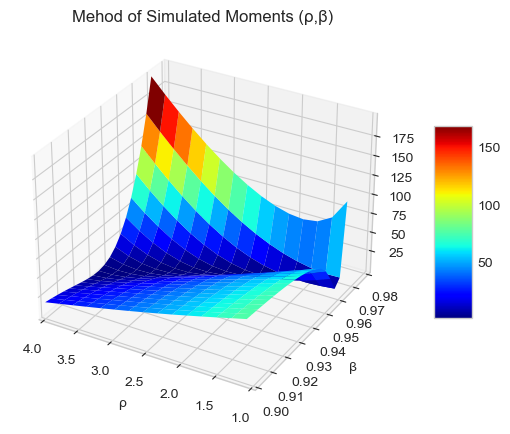

In [12]:
#Plot figure in three dimensions
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Make data.
X, Y = np.meshgrid(rho, beta)

# Plot the surface.
surf = ax.plot_surface(X, Y, obj, cmap=cm.jet)

# Customize the axis.
ax.set_xlabel(f'\u03C1')
ax.set_ylabel(f'\u03B2')
ax.set_title(f'Mehod of Simulated Moments (\u03C1,\u03B2)')
ax.set_xlim(1.0,4.0)
ax.set_ylim(0.9,0.98)
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

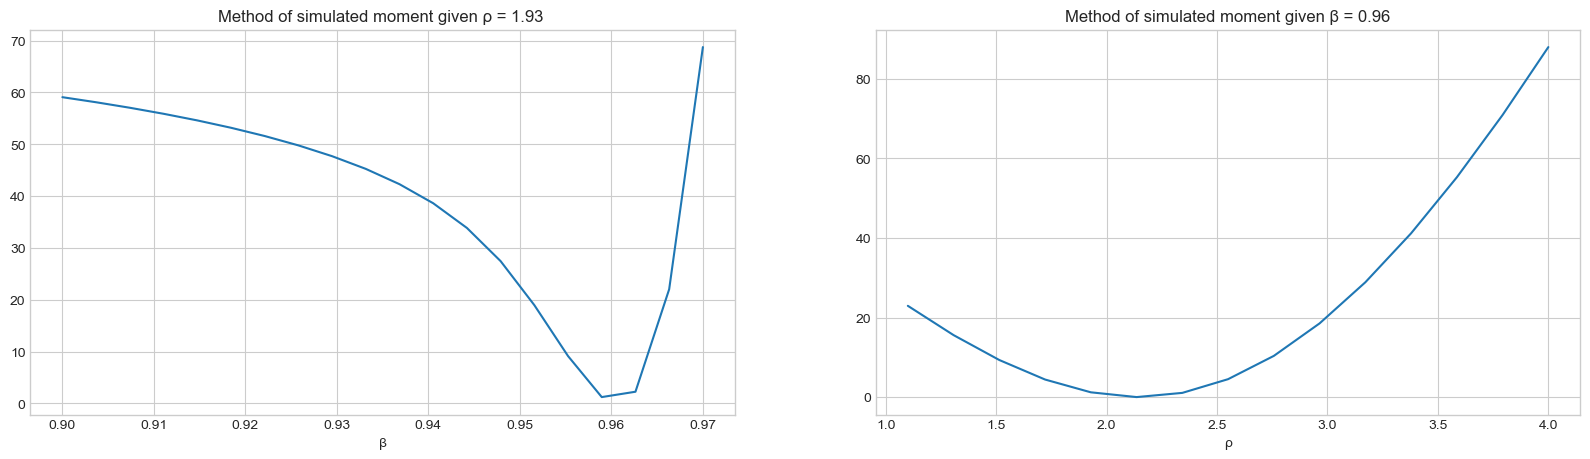

In [13]:
# Plot figure in two dimensions
i_rho = abs(par_rho - rho).argmin(0) #index of rho closest to true rho
i_beta = abs(par_beta - beta).argmin(0) #index of beta closest to true beta

#Set up figure
fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(beta,obj[:,i_rho])
ax.set_xlabel(f'\u03B2')
ax.set_title(f'Method of simulated moment given \u03C1 = {rho[i_rho]:.2f} ')

ax = fig.add_subplot(1,2,2)
ax.plot(rho,obj[i_beta,:])
ax.set_xlabel(f'\u03C1')
ax.set_title(f'Method of simulated moment given \u03B2 = {beta[i_beta]:.2f}')


plt.show()

##### g) Estimate by MSM

In [14]:
est_par = ['beta'] # Parameter to estimate
theta0 = [0.92] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)

print(f'Objective:               {est.fun:.4f}')
print(f'beta:                    {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')


Objective:               0.0006
beta:                    0.9601
Number of iterartions:   4


In [15]:
est_par = ['rho'] # Parameter to estimate
theta0 = [4] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')


Objective:               0.0009
rho:                     2.0142
Number of iterartions:   6


In [16]:
est_par = ['rho','beta'] # Parameters to estimate
theta0 = [4, 0.92] # Initial guesses

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'beta:                    {est.x[1]:.4f}')
print(f'Number of iterartions:   {est.nit}')


Objective:               0.0001
rho:                     1.9232
beta:                    0.9607
Number of iterartions:   26
